### Exploratory Data Analysis (EDA)

- Organization of the file data-visualisation.ipymb:

Code 1: Imports and Style of our plot 

Code 2: (Read and downsize of) the dataset 

Code 3: First look at the structure of the dataset (fist 4 lines)

Code 4: First look at the atribute review (example)

Code 5: Number of instances for the different and relevant atributes 

Code 6: Legeraging the atributes 'review' 'rating', 'drugName', 'Condition' and 'usefulCount'

  - <small>Code 6.1: Drugs with only one or two review (%)</small>
  - <small>Code 6.2 - Count of Reviews by Rating (%)</small>
  - <small>Code 6.3: Count of Reviews by Rating (%)</small>
  - <small>Code 6.4: Top 10 Most Reviewed Drugs</small>
  - <small>Code 6.5: Top 10 Drugs by UsefulCount</small>
  - <small>Code 6.6: Top 10 Most Reviewed Conditions</small>
  - <small>Code 6.7: Top 10 Conditions by UsefulCount</small>
  - <small>Code 6.8: Top 10 Most Reviewed Drugs with Their Mean Ratings</small>
  - <small>Code 6.9: Top 10 Drugs by UsefulCount and Their Mean Ratings</small>
  - <small>Code 6.10: Number of Unique Conditions for the Top 10 Drugs by UsefulCount
</small>
  - <small>Code 6.11: Number of Unique Drugs for the Top 10 Conditions by UsefulCount</small>


Code 7: Top 10 prevalent 'drugName-condition' pairs
  - <small>Code 7.1 to 7.10: Top 10 prevalent drug-condition pairs</small>


Code 8: More of the atribute 'usefulCount'
  - <small>Code 8.1: Usefulness vs Rating</small>
  - <small>Code 8.2: Usefulness vs. Review Length</small>
  - <small>Code 8.3: The Most Useful Review for Each of the Top 10 Drugs by UsefulCount</small>
  - <small>Code 8.4: The Most Useful FULL Review for Each of the Top 10 Drugs by UsefulCount</small>


Code 9: A look a the atribute 'date'
  - <small>Code 9.1: Review Semtiment Over Time</small>
  - <small>Code 9.2: Review Semtiment Over Time (Smoothed)</small>
  - <small>Code 9.4: Percentage of Each Sentiment Per Year</small>
  - <small>Code 9.5: Exact Percentage of Each Sentiment Per Year</small>




In [2]:
# Code 1: Imports and Style of our plot 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import nltk 
import textwrap 

# The style of our plot 
plt.style.use('ggplot')

In [3]:
# Code 2: Read (and downsize of) the dataset 

# Read the datasets 
alldata = [
    pd.read_csv(r'C:\Users\Home\Desktop\TESE\MEIC-TFM\MEIC-TFM\drugsComTrain_raw_or.csv'),    
    pd.read_csv(r'C:\Users\Home\Desktop\TESE\MEIC-TFM\MEIC-TFM\drugsComTest_raw_or.csv')
]

ds = pd.concat(alldata, ignore_index=True) # Joining both train and test datasets
print(ds.shape)

# For initial easy and quick visualisation (downsize)
#ds = ds.head(30000)


(215063, 7)


In [4]:
# Code 3: First look at the structure of the dataset (fist 4 lines)
# Important to see and reference to the collums/attributes available to us

ds.head()

# Generate LaTeX: 
# latex_code = ds.head(4).to_latex(index=False)
# print(latex_code)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
# Code 4: First look at the atribute review (example)
# Important for the correct choice and build of a NLP pipeline - Cleaning and pre-processing 

# Visualisation of the review in the line 7
long_review = ds['review'].values[7] 

# Print a wrapped text for better visualisation
wrapped_text = textwrap.fill(long_review, width=100)
print(wrapped_text)

"Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify
at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out
of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the
next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured
though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me
because I have tried to get off it and lost complete control over my emotions. Went back on it and I
was golden again.  I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past.
Only side effect is I like to eat a lot."


In [6]:
# Code 5: Number of instances for the different and relevant atributes 

# Number of Unique Drugs
unique_drugs = ds['drugName'].nunique()

# Number of Unique Conditions
unique_conditions = ds['condition'].nunique()

# # Sum of usefulCount across all reviews
total_usefulCount = ds['usefulCount'].sum()

# Number of Unique uniqueID
unique_uniqueID = ds['uniqueID'].nunique()

# Total Number of Reviews
total_reviews = len(ds)

# Compile the information into a Table for easy visualization
summary_table = pd.DataFrame({
    'Attribute': ['Drugs', 'Conditions', 'Total usefulCount', 'Dataset Size (uniqueID)', 'Total Reviews'],
    'Count': [unique_drugs, unique_conditions, total_usefulCount, unique_uniqueID, total_reviews]
})

summary_table

# Generate LaTeX: 
# latex_code = summary_table.to_latex(index=False)
# print(latex_code)

,Attribute,Count
0,Drugs,3671
1,Conditions,916
2,Total usefulCount,6021980
3,Dataset Size (uniqueID),215063
4,Total Reviews,215063


Code 6: Leveraging the atributes 'drugName', 'condition', 'usefulCount', 'review'and 'rating'

In [7]:
# Code 6.1: Drugs with only one or two review (%)

# Count the number of reviews for each drug
reviews_count_by_drug = ds['drugName'].value_counts()

# Filter to include only drugs with one or two reviews
drugs_with_one_or_two_reviews = reviews_count_by_drug[(reviews_count_by_drug == 1) | (reviews_count_by_drug == 2)]

# Calculate the percentage of drugs with only one or two reviews
percentage = (len(drugs_with_one_or_two_reviews) / ds['drugName'].nunique()) * 100

print(f"Percentage of drugs with only one or two reviews: {percentage:.2f}%")

Percentage of drugs with only one or two reviews: 32.42%


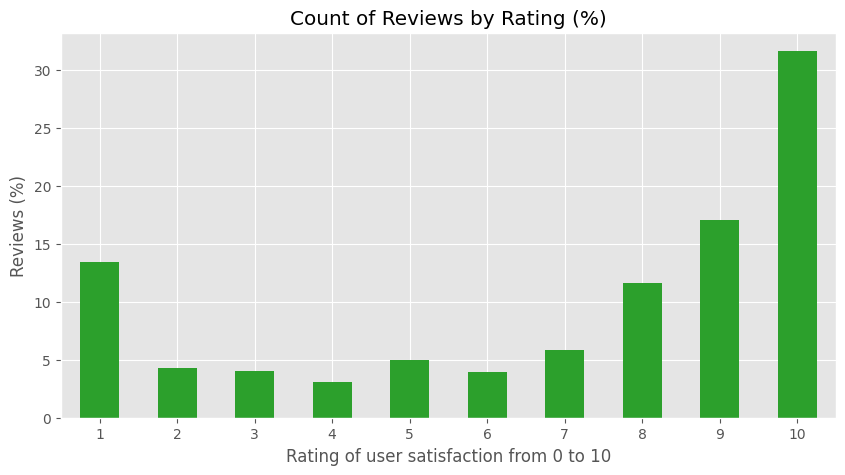

In [8]:
# Code 6.2: Count of Reviews by Rating (%)

# Calculate the percentage of each rating
ratings_percentage = ds['rating'].value_counts(normalize=True).sort_index() * 100

# Plot the data
ax = ratings_percentage.plot(kind='bar', color= 'tab:green', title="Count of Reviews by Rating (%)", figsize=(10, 5))
ax.set_xlabel('Rating of user satisfaction from 0 to 10')
ax.set_ylabel('Reviews (%)')

plt.xticks(rotation=0)
plt.show()

In [9]:
# Calculate the exact percentage of each rating
ratings_percentage = ds['rating'].value_counts(normalize=True).sort_index() * 100

for rating, percentage in ratings_percentage.items():
    print(f"Rating: {rating}, Percentage: {percentage:.2f}%")

Rating: 1, Percentage: 13.45%
Rating: 2, Percentage: 4.31%
Rating: 3, Percentage: 4.05%
Rating: 4, Percentage: 3.10%
Rating: 5, Percentage: 4.99%
Rating: 6, Percentage: 3.93%
Rating: 7, Percentage: 5.83%
Rating: 8, Percentage: 11.65%
Rating: 9, Percentage: 17.07%
Rating: 10, Percentage: 31.62%


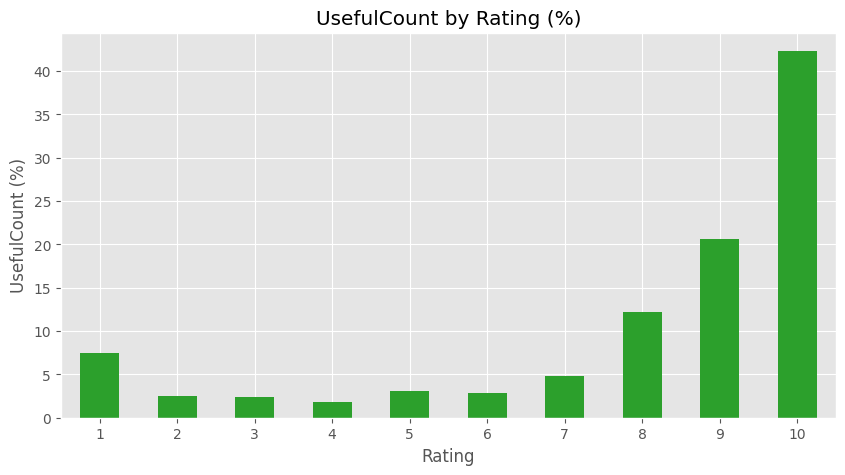

In [10]:
# Code 6.3: UsefulCount by Rating (%)

# Calculate the total usefulCount by rating
usefulCount_by_rating = ds.groupby('rating')['usefulCount'].sum()

# Calculate the total usefulCount across all ratings to normalize
total_usefulCount = usefulCount_by_rating.sum()

# Calculate the percentage of total usefulCount contributed by each rating
usefulCount_percentage = (usefulCount_by_rating / total_usefulCount) * 100

# Plot the data
ax = usefulCount_percentage.plot(kind='bar', color='tab:green', title="UsefulCount by Rating (%)", figsize=(10, 5))
ax.set_xlabel('Rating')
ax.set_ylabel('UsefulCount (%)')

ax.yaxis.set_major_locator(ticker.MultipleLocator(5))  

plt.xticks(rotation=0) 
plt.show()

In [15]:
# Calculate the exact total usefulCount by Rating
usefulCount_by_rating = ds.groupby('rating')['usefulCount'].sum()

# Calculate the total usefulCount across all ratings to normalize
total_usefulCount = usefulCount_by_rating.sum()

# Calculate the percentage of total usefulCount contributed by each rating
usefulCount_percentage = (usefulCount_by_rating / total_usefulCount) * 100

for rating, percentage in usefulCount_percentage.items():
    print(f"Rating: {rating}, UsefulCount Percentage: {percentage:.2f}%")

Rating: 1, UsefulCount Percentage: 7.53%
Rating: 2, UsefulCount Percentage: 2.51%
Rating: 3, UsefulCount Percentage: 2.34%
Rating: 4, UsefulCount Percentage: 1.83%
Rating: 5, UsefulCount Percentage: 3.06%
Rating: 6, UsefulCount Percentage: 2.80%
Rating: 7, UsefulCount Percentage: 4.83%
Rating: 8, UsefulCount Percentage: 12.18%
Rating: 9, UsefulCount Percentage: 20.60%
Rating: 10, UsefulCount Percentage: 42.32%


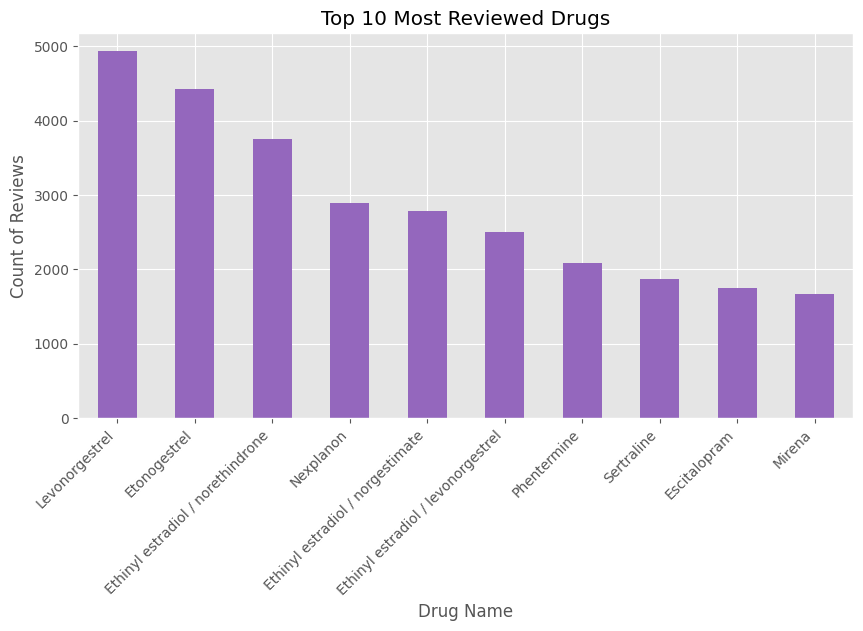

In [12]:
# Code 6.4: Top 10 Most Reviewed Drugs

# Count the number of reviews for each drug 
reviews_count_by_drug = ds['drugName'].value_counts()

# Select the top 10 most reviewed drugs
top_10_drugs = reviews_count_by_drug.head(10)

# Plot the data
top_10_drugs.plot(kind='bar', color= 'tab:purple', figsize=(10, 5), title='Top 10 Most Reviewed Drugs')
plt.xlabel('Drug Name')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45, ha="right") 
plt.show()

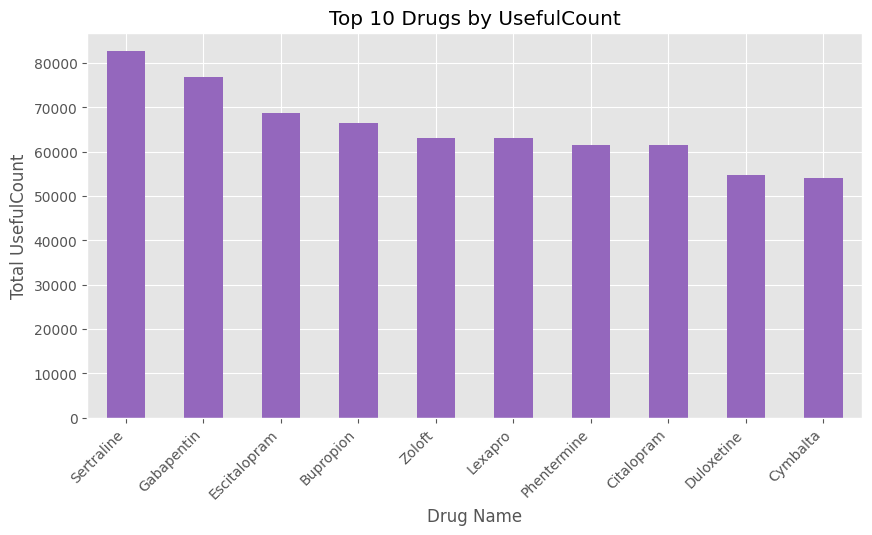

In [13]:
# Code 6.5: Top 10 Drugs by UsefulCount

# Sum the 'usefulCount' for each drug
total_usefulCount_by_drug = ds.groupby('drugName')['usefulCount'].sum()

# Sort the drugs by their total usefulCount in descending order
sorted_drugs_by_usefulCount = total_usefulCount_by_drug.sort_values(ascending=False)

# Select the top 10 drugs based on their total usefulCount
top_10_drugs_by_usefulCount = sorted_drugs_by_usefulCount.head(10)

# Plot the data
top_10_drugs_by_usefulCount.plot(kind='bar', color='tab:purple', figsize=(10, 5), title='Top 10 Drugs by UsefulCount')
plt.xlabel('Drug Name')
plt.ylabel('Total UsefulCount')
plt.xticks(rotation=45, ha="right")
plt.show()


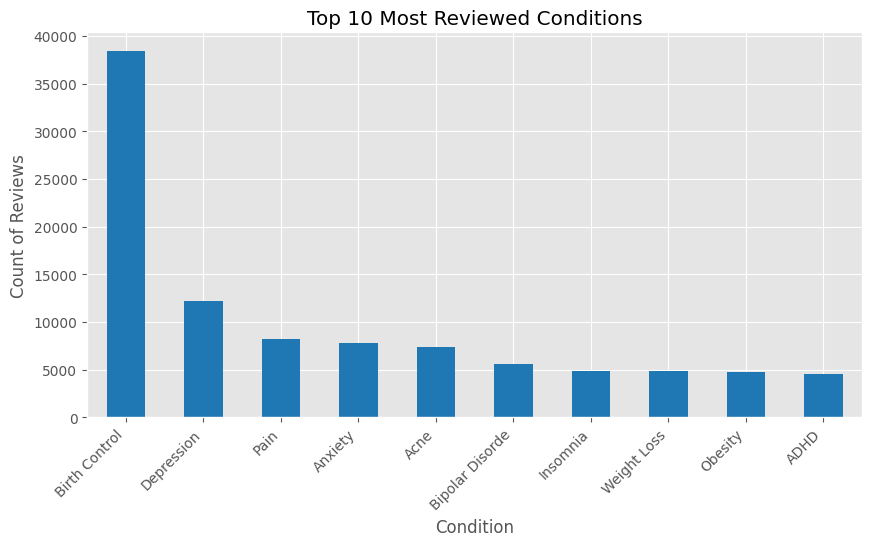

In [14]:
# Code 6.6: Top 10 Most Reviewed Conditions

# Count the number of reviews for each condition
reviews_count_by_condition = ds['condition'].value_counts()

# Select the top 10 most reviewed conditions
top_10_conditions = reviews_count_by_condition.head(10)

# Plot the data
top_10_conditions.plot(kind='bar', color= 'tab:blue', figsize=(10, 5), title='Top 10 Most Reviewed Conditions')
plt.xlabel('Condition')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45, ha="right")
plt.show()

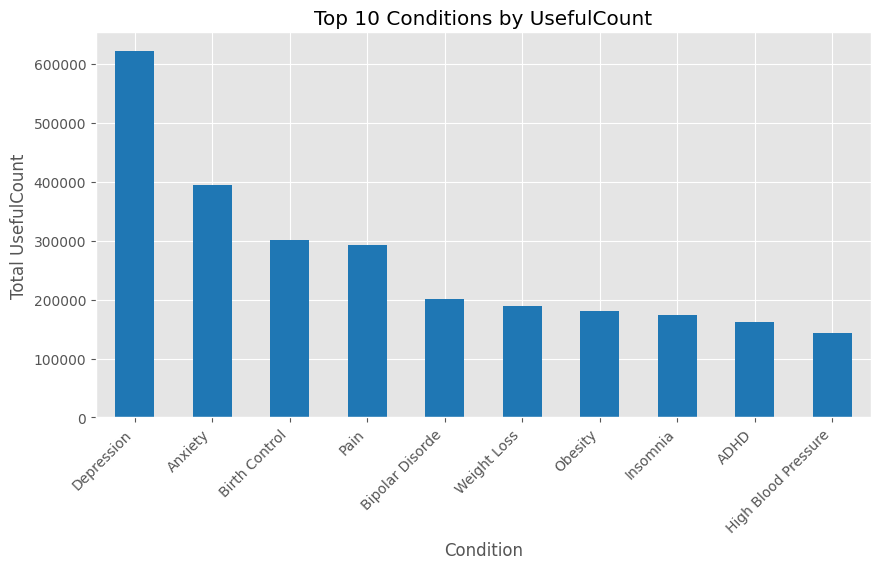

In [12]:
# Code 6.7: Top 10 Conditions by UsefulCount

# Sum the 'usefulCount' for each condition
total_usefulCount_by_condition = ds.groupby('condition')['usefulCount'].sum()

# Sort the conditions by their total usefulCount in descending order
sorted_conditions_by_usefulCount = total_usefulCount_by_condition.sort_values(ascending=False)

# Select the top 10 conditions based on their total usefulCount
top_10_conditions_by_usefulCount = sorted_conditions_by_usefulCount.head(10)

# Plot the data
top_10_conditions_by_usefulCount.plot(kind='bar', color='tab:blue', figsize=(10, 5), title='Top 10 Conditions by UsefulCount')
plt.xlabel('Condition')
plt.ylabel('Total UsefulCount')
plt.xticks(rotation=45, ha="right")  # Improve label readability
plt.show()


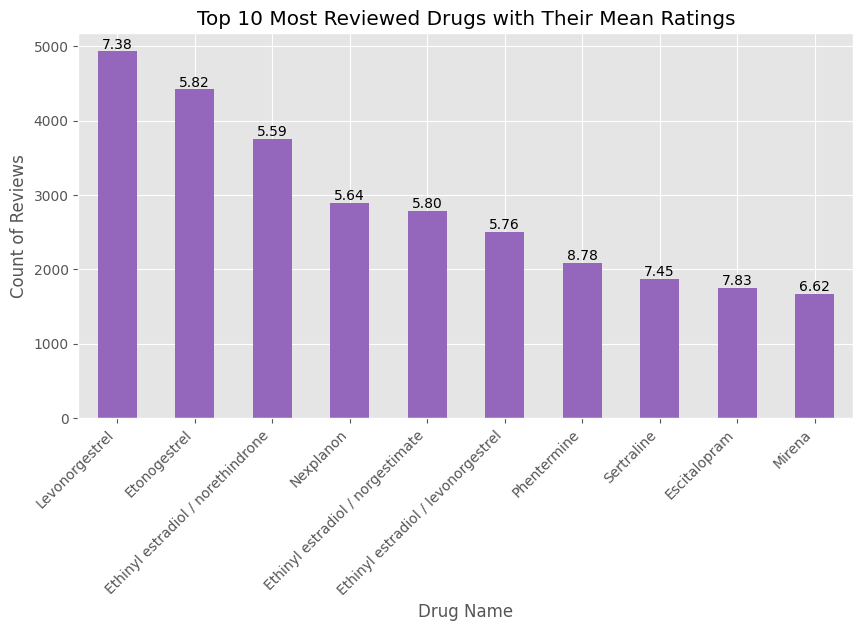

Mean of the mean ratings for the top 10 most reviewed drugs: 6.67


In [16]:
# Code 6.8: Top 10 Most Reviewed Drugs with Their Mean Ratings

# Calculate the mean rating for each drug
mean_ratings = ds.groupby('drugName')['rating'].mean().sort_values(ascending=False)

# Count of reviews for each drug
reviews_count_all_drugs = ds['drugName'].value_counts()

# Select the top 10 most reviewed drugs
top_10_drugs_names = reviews_count_all_drugs.head(10).index

# Filter the mean ratings for these top 10 most reviewed drugs
mean_ratings_top_10_drugs = mean_ratings[top_10_drugs_names]

# Plot the data
top_10_drugs_reviews = reviews_count_all_drugs.loc[top_10_drugs_names]
top_10_drugs_reviews.plot(kind='bar', color='tab:purple', figsize=(10, 5), title='Top 10 Most Reviewed Drugs with Their Mean Ratings')
plt.xlabel('Drug Name')
plt.ylabel('Count of Reviews')

# Annotate each bar with its mean rating
for index, value in enumerate(top_10_drugs_reviews):
    plt.text(index, value, f'{mean_ratings_top_10_drugs[index]:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45, ha="right") 
plt.show()

mean_of_means = mean_ratings_top_10_drugs.mean()
print(f'Mean of the mean ratings for the top 10 most reviewed drugs: {mean_of_means:.2f}')

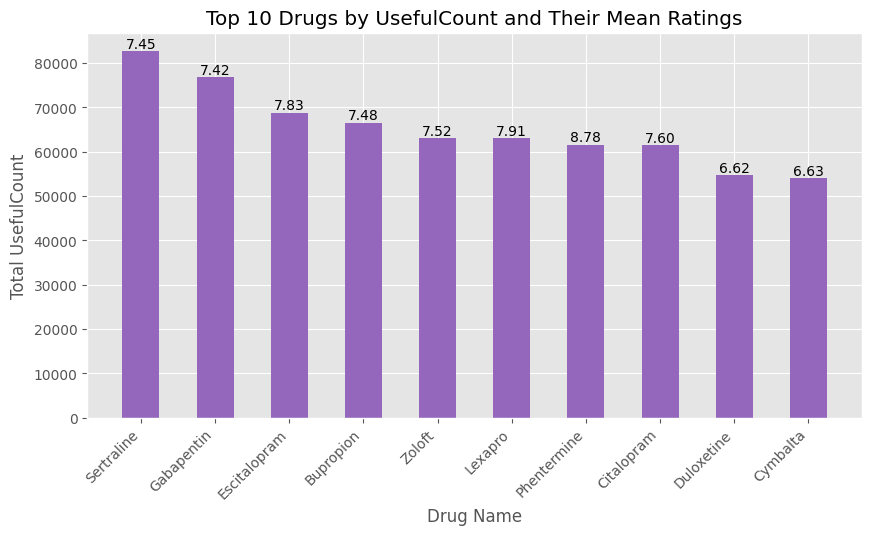

Mean of the mean ratings for the top 10 drugs by usefulCount: 7.52


In [17]:
# Code 6.9: Top 10 Drugs by UsefulCount and Their Mean Ratings

# Sum of the usefulCount for each drug across all ratings
total_useful_by_drug = ds.groupby('drugName')['usefulCount'].sum().sort_values(ascending=False)

# Select the top 10 drugs based on total usefulCount
top_10_drugs_by_usefulCount = total_useful_by_drug.head(10)

# Calculate the mean rating for these top 10 drugs
mean_rating_top_10_drugs = ds[ds['drugName'].isin(top_10_drugs_by_usefulCount.index)].groupby('drugName')['rating'].mean()

# Ensure the order of drugs matches that of the top 10 by usefulCount for plotting 
mean_rating_top_10_ordered = mean_rating_top_10_drugs.reindex(top_10_drugs_by_usefulCount.index)

# Plot the data 
plt.figure(figsize=(10, 5))
bars = plt.bar(top_10_drugs_by_usefulCount.index, top_10_drugs_by_usefulCount.values, color='tab:purple', width=0.5) 
plt.title('Top 10 Drugs by UsefulCount and Their Mean Ratings')
plt.xlabel('Drug Name')
plt.ylabel('Total UsefulCount')

# Annotate each bar with the mean rating
for bar, mean_rating in zip(bars, mean_rating_top_10_ordered):
    plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height(), f'{mean_rating:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45, ha="right") 
plt.show()

mean_of_means_rating = mean_rating_top_10_ordered.mean()
print(f'Mean of the mean ratings for the top 10 drugs by usefulCount: {mean_of_means_rating:.2f}')


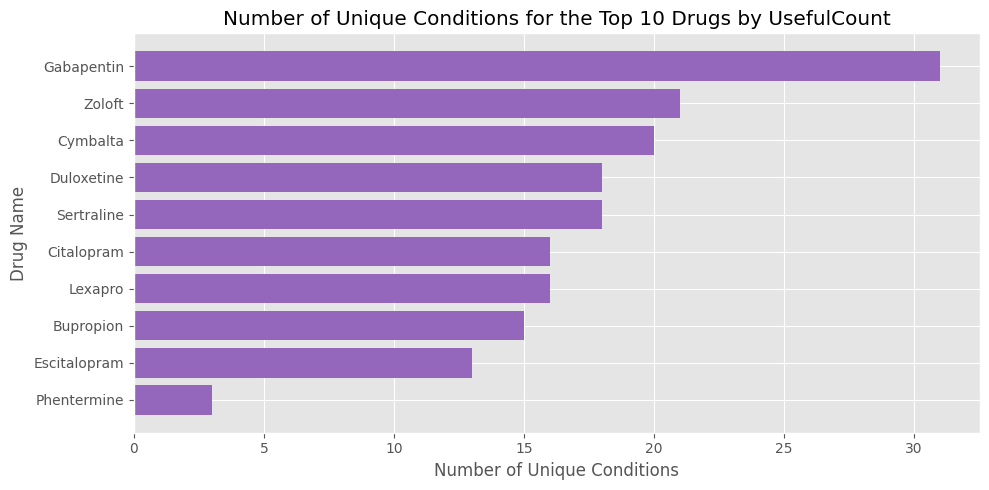

In [18]:
# Code 6.10: Number of Unique Conditions for the Top 10 Drugs by UsefulCount

# The top 10 drugs by usefulCount
total_useful_by_drug = ds.groupby('drugName')['usefulCount'].sum().sort_values(ascending=False)
top_10_drugs_by_usefulCount = total_useful_by_drug.head(10).index

# For each of the top 10 drugs by usefulCount, the number of unique conditions
conditions_per_drug = {'Drug Name': [], 'Number of Unique Conditions': []}
for drug in top_10_drugs_by_usefulCount:
    conditions_count = ds[ds['drugName'] == drug]['condition'].nunique()
    conditions_per_drug['Drug Name'].append(drug)
    conditions_per_drug['Number of Unique Conditions'].append(conditions_count)

# Convert the dictionary to a DataFrame
conditions_per_drug_df = pd.DataFrame(conditions_per_drug)

# Sort the DataFrame based on 'Number of Unique Conditions' for plotting
conditions_per_drug_df.sort_values(by='Number of Unique Conditions', ascending=True, inplace=True)

# Plot the data 
plt.figure(figsize=(10, 5))
plt.barh(conditions_per_drug_df['Drug Name'], conditions_per_drug_df['Number of Unique Conditions'], color='tab:purple')
plt.xlabel('Number of Unique Conditions')
plt.ylabel('Drug Name')
plt.title('Number of Unique Conditions for the Top 10 Drugs by UsefulCount')
plt.tight_layout()
plt.show()

In [20]:
# Calculate the exact total usefulCount by each drug
total_useful_by_drug = ds.groupby('drugName')['usefulCount'].sum().sort_values(ascending=False)
top_10_drugs_by_usefulCount = total_useful_by_drug.head(10).index

# Calculate the number of unique conditions for each of the top 10 drugs
conditions_per_drug = {'Drug Name': [], 'Number of Unique Conditions': []}
for drug in top_10_drugs_by_usefulCount:
    conditions_count = ds[ds['drugName'] == drug]['condition'].nunique()
    conditions_per_drug['Drug Name'].append(drug)
    conditions_per_drug['Number of Unique Conditions'].append(conditions_count)

# Convert the dictionary to a DataFrame
conditions_per_drug_df = pd.DataFrame(conditions_per_drug)
print(conditions_per_drug_df)


      Drug Name  Number of Unique Conditions
0    Sertraline                           18
1    Gabapentin                           31
2  Escitalopram                           13
3     Bupropion                           15
4        Zoloft                           21
5       Lexapro                           16
6   Phentermine                            3
7    Citalopram                           16
8    Duloxetine                           18
9      Cymbalta                           20


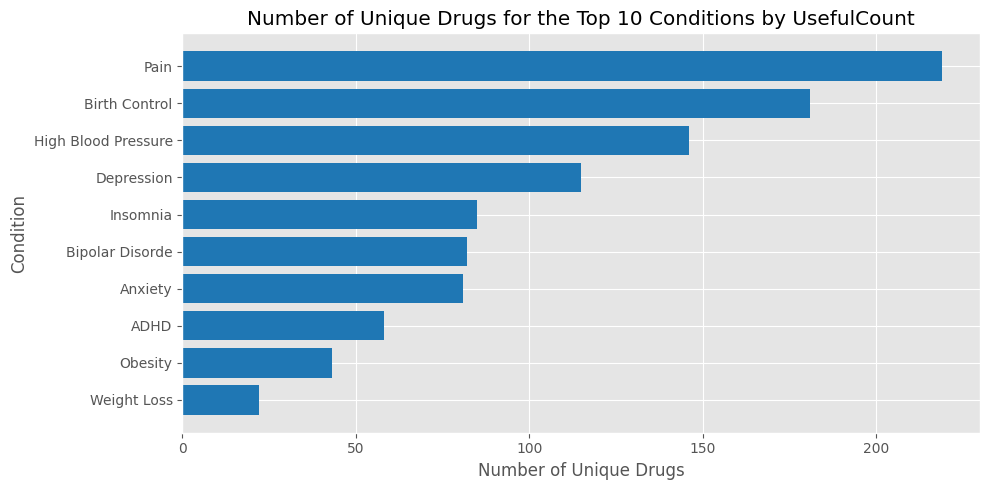

In [21]:
# Code 6.11: Number of Unique Drugs for the Top 10 Conditions by UsefulCount

# Recalculate 'top_10_conditions_by_usefulCount'
total_usefulCount_by_condition = ds.groupby('condition')['usefulCount'].sum().sort_values(ascending=False)
top_10_conditions_by_usefulCount = total_usefulCount_by_condition.head(10)

# Names of the top 10 conditions
top_10_conditions_names = top_10_conditions_by_usefulCount.index

# Calculate the number of unique drugs for each of these top 10 conditions by usefulCount
drugs_per_top_condition = {
    'Condition': top_10_conditions_names, 
    'Number of Unique Drugs': [ds[ds['condition'] == condition]['drugName'].nunique() for condition in top_10_conditions_names]
}

# Convert the dictionary to a DataFrame 
drugs_per_top_condition_df = pd.DataFrame(drugs_per_top_condition)

# Sort the DataFrame based on 'Number of Unique Drugs' for plotting
drugs_per_top_condition_df.sort_values(by='Number of Unique Drugs', ascending=True, inplace=True)

# Plot the data 
plt.figure(figsize=(10, 5))
plt.barh(drugs_per_top_condition_df['Condition'], drugs_per_top_condition_df['Number of Unique Drugs'], color='tab:blue')
plt.xlabel('Number of Unique Drugs')
plt.ylabel('Condition')
plt.title('Number of Unique Drugs for the Top 10 Conditions by UsefulCount')
plt.tight_layout()
plt.show()



In [22]:
# Calculate exact the total usefulCount by condition and identify the top 10
total_usefulCount_by_condition = ds.groupby('condition')['usefulCount'].sum().sort_values(ascending=False)
top_10_conditions_by_usefulCount = total_usefulCount_by_condition.head(10)

# Names of the top 10 conditions
top_10_conditions_names = top_10_conditions_by_usefulCount.index

# Calculate the number of unique drugs for each of these top 10 conditions by usefulCount
drugs_per_top_condition = {
    'Condition': top_10_conditions_names, 
    'Number of Unique Drugs': [ds[ds['condition'] == condition]['drugName'].nunique() for condition in top_10_conditions_names]
}

# Convert the dictionary to a DataFrame 
drugs_per_top_condition_df = pd.DataFrame(drugs_per_top_condition)

print(drugs_per_top_condition_df)


             Condition  Number of Unique Drugs
0           Depression                     115
1              Anxiety                      81
2        Birth Control                     181
3                 Pain                     219
4      Bipolar Disorde                      82
5          Weight Loss                      22
6              Obesity                      43
7             Insomnia                      85
8                 ADHD                      58
9  High Blood Pressure                     146


Code 7: Top 10 prevalent 'drugName-condition' pairs

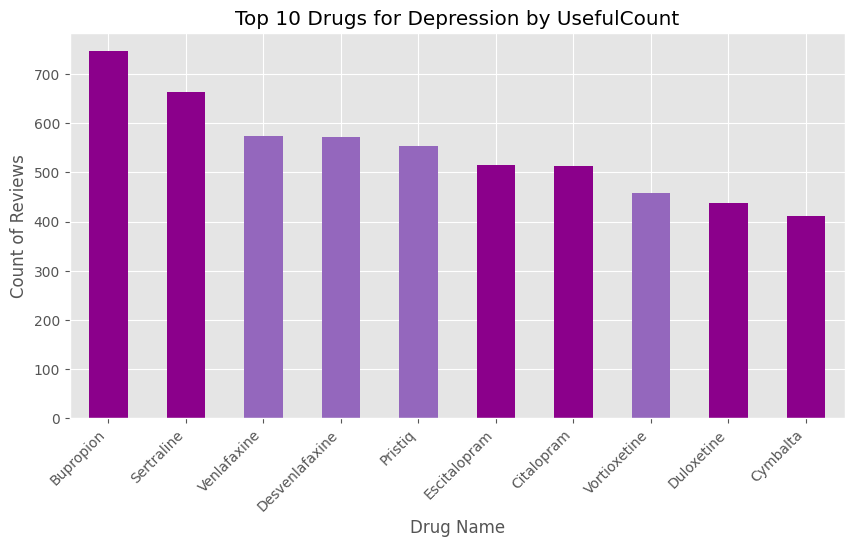

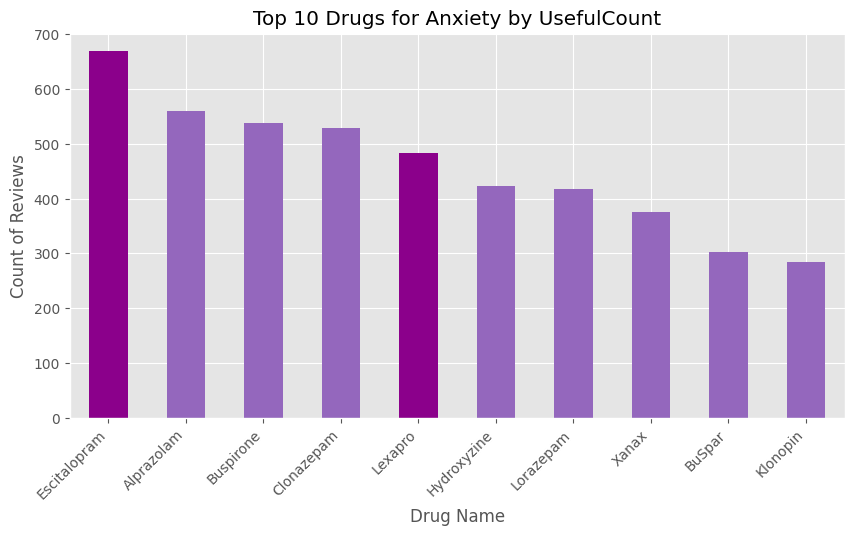

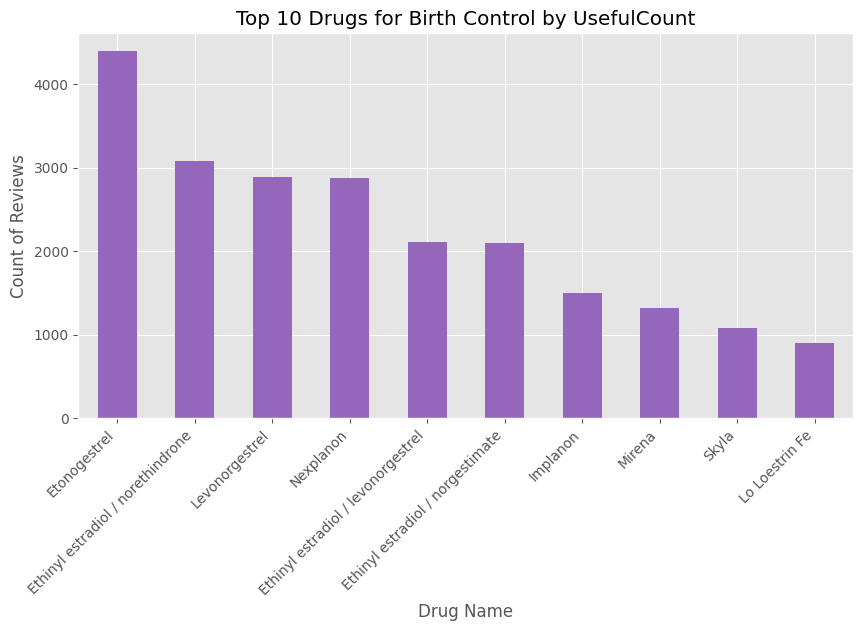

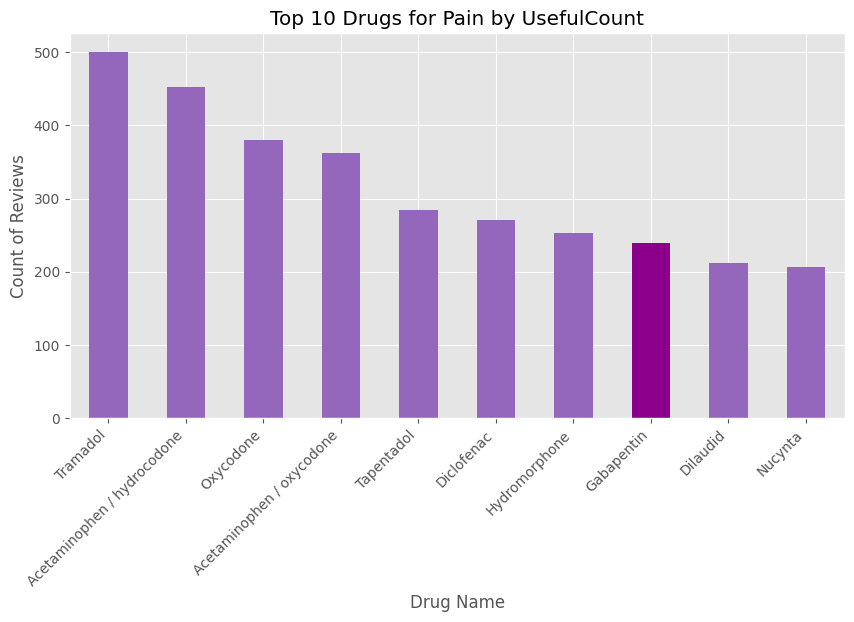

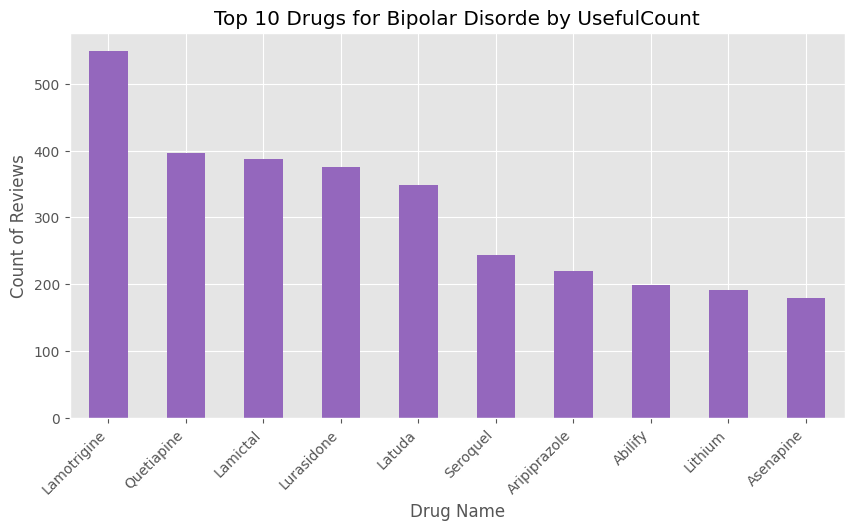

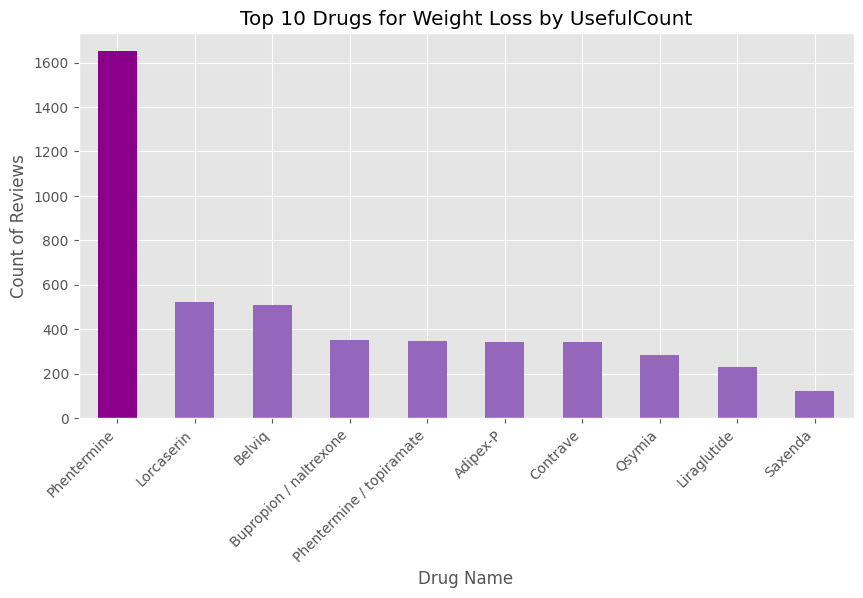

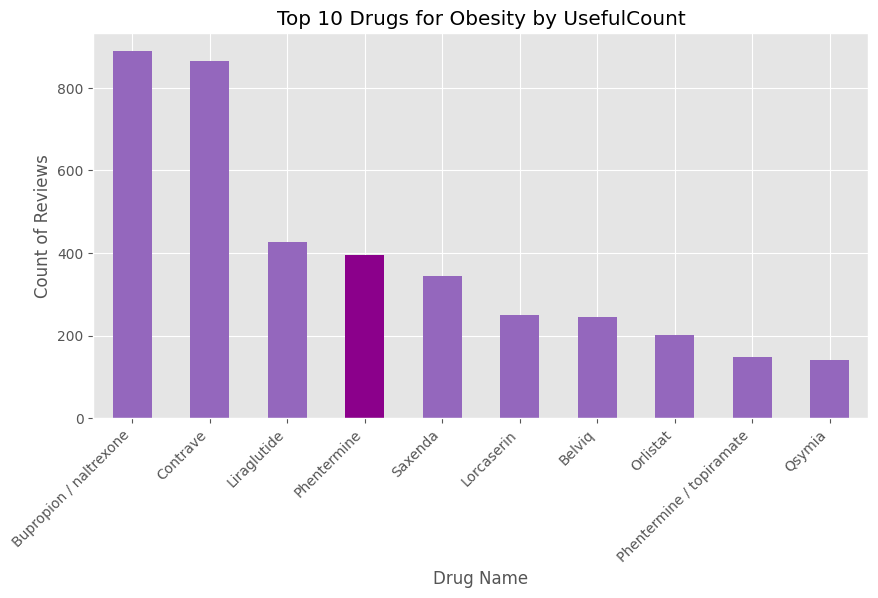

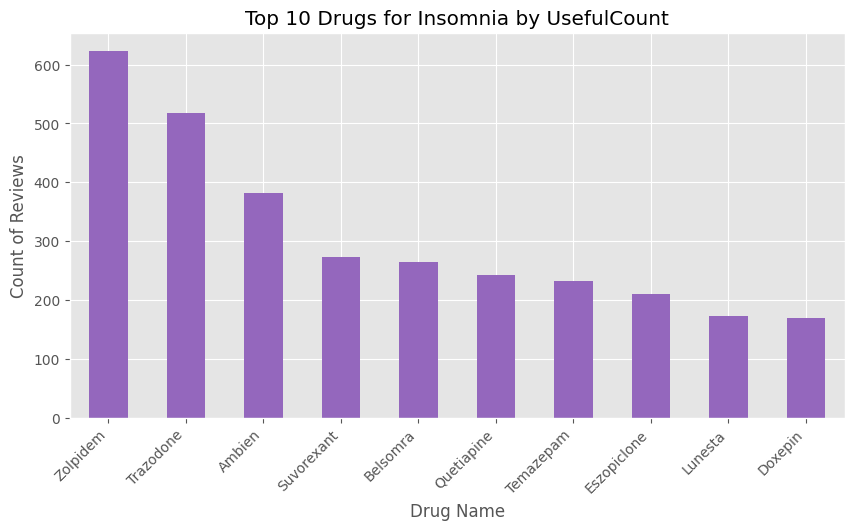

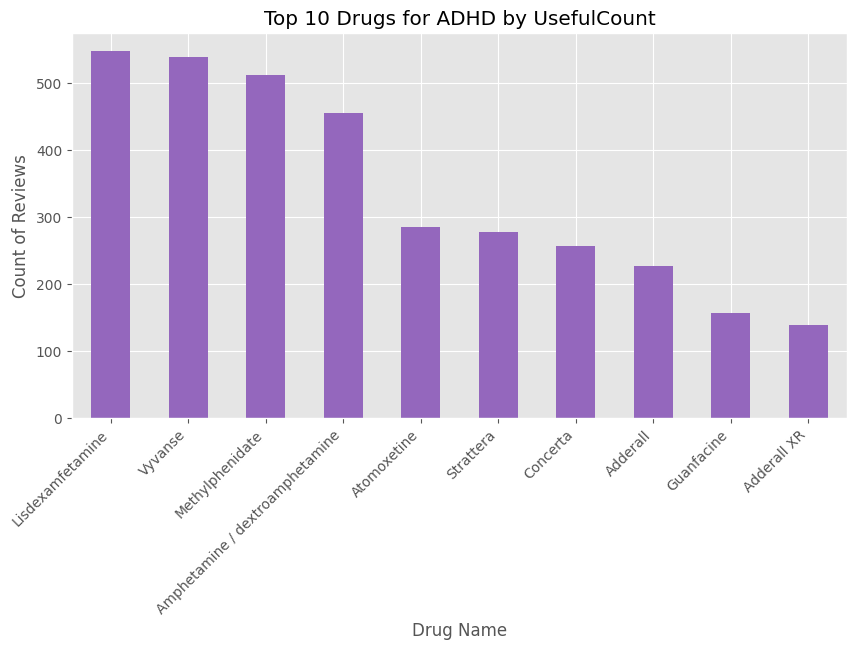

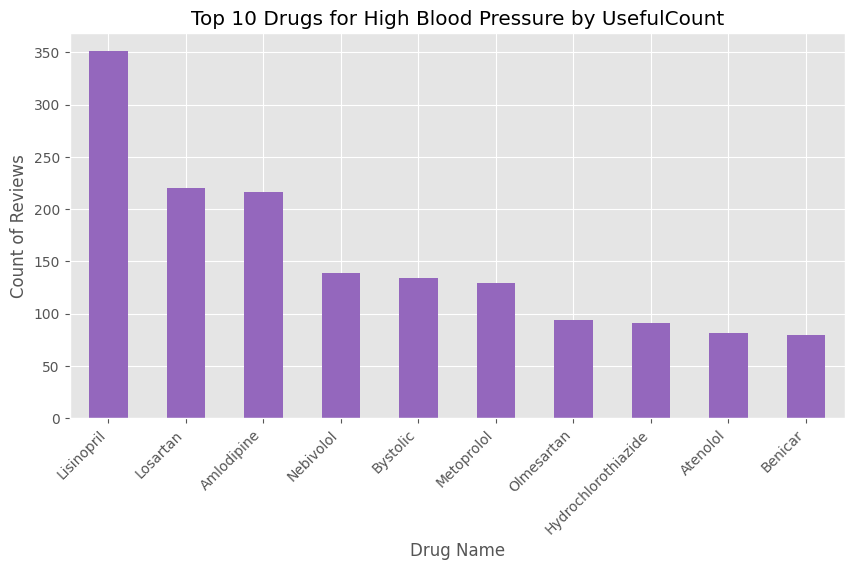

In [23]:
# Code 7.1 to 7.10: Top 10 prevalent drug-condition pairs

# Sum the usefulCount for each drug and sort them in descending order to find the top 10
top_10_drugs_by_usefulCount = ds.groupby('drugName')['usefulCount'].sum().sort_values(ascending=False).head(10)

# Names of the top 10 drugs by usefulcount
top_10_drugs_names = top_10_drugs_by_usefulCount.index

# Names of the top 10 conditions by usefulcount
top_10_conditions_names = top_10_conditions_by_usefulCount.index

# For each of the top 10 conditions by usefulCount, find and plot the top 10 drugs
for condition in top_10_conditions_names:
    # Filter reviews for the current condition
    condition_reviews = ds[ds['condition'] == condition]
    
    # Count the number of reviews for each drug for this condition
    top_drugs_for_condition = condition_reviews['drugName'].value_counts().head(10)
    
    # Plot the data for each condition
    plt.figure(figsize=(10, 5))
    colors = ['darkmagenta' if drug in top_10_drugs_names else 'tab:purple' for drug in top_drugs_for_condition.index]
    top_drugs_for_condition.plot(kind='bar', color=colors)
    plt.title(f'Top 10 Drugs for {condition} by UsefulCount')
    plt.xlabel('Drug Name')
    plt.ylabel('Count of Reviews')
    plt.xticks(rotation=45, ha="right") 
    plt.show()


Code 8: More of the atribute 'usefulCount'

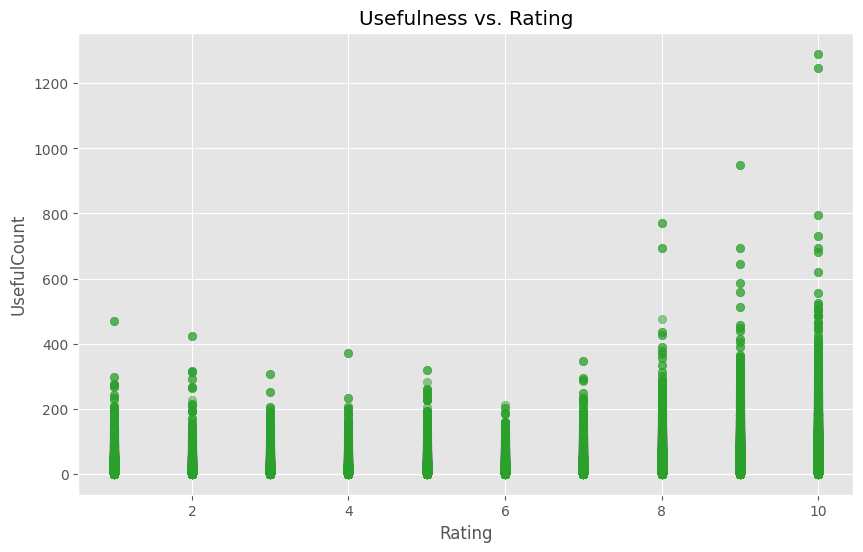

Rating with the highest total usefulCount: 10 (Total usefulCount: 2548464)
Rating with the lowest total usefulCount: 4 (Total usefulCount: 110241)
Rating 1: Total usefulCount: 453167
Rating 2: Total usefulCount: 151356
Rating 3: Total usefulCount: 140646
Rating 4: Total usefulCount: 110241
Rating 5: Total usefulCount: 184452
Rating 6: Total usefulCount: 168582
Rating 7: Total usefulCount: 291086
Rating 8: Total usefulCount: 733645
Rating 9: Total usefulCount: 1240341
Rating 10: Total usefulCount: 2548464


In [24]:
# Code 8.1: Usefulness vs. Rating

# Scatter plot 
plt.figure(figsize=(10, 6))
plt.scatter(ds['rating'], ds['usefulCount'], alpha=0.5, color='tab:green')
plt.title('Usefulness vs. Rating')
plt.xlabel('Rating')
plt.ylabel('UsefulCount')
plt.grid(True)
plt.show()

# Group by rating and sum usefulCount for each rating
rating_usefulness_sum = ds.groupby('rating')['usefulCount'].sum()

# Find the rating with the highest total usefulCount
max_useful_rating = rating_usefulness_sum.idxmax()
max_useful_count = rating_usefulness_sum.max()

# Find the rating with the lowest total usefulCount
min_useful_rating = rating_usefulness_sum.idxmin()
min_useful_count = rating_usefulness_sum.min()

# Print the rating with the highest and lowest total usefulCount
print(f"Rating with the highest total usefulCount: {max_useful_rating} (Total usefulCount: {max_useful_count})")
print(f"Rating with the lowest total usefulCount: {min_useful_rating} (Total usefulCount: {min_useful_count})")

# Print the total usefulCount for each rating
for rating, useful_count in rating_usefulness_sum.items():
    print(f"Rating {rating}: Total usefulCount: {useful_count}")




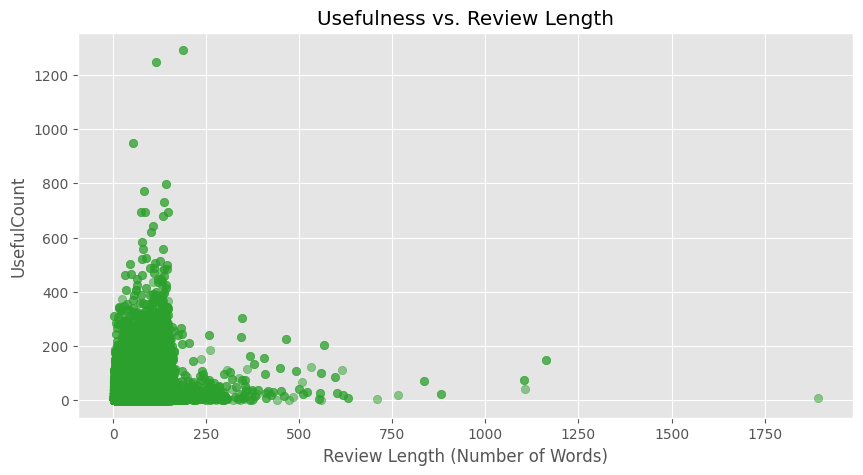

Length of the most useful review: 187 words


In [25]:
# Code 8.2: Usefulness vs. Review Length

# The length of each review
ds['reviewLength'] = ds['review'].apply(lambda x: len(x.split()))

# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(ds['reviewLength'], ds['usefulCount'], alpha=0.5, color='tab:green')
plt.title('Usefulness vs. Review Length')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('UsefulCount')
plt.grid(True)
plt.show()

# Identify the length of the most useful review
max_useful_count = ds['usefulCount'].max()  # Find the highest usefulcount
most_useful_review_length = ds[ds['usefulCount'] == max_useful_count]['reviewLength'].iloc[0]  # Get the length of the review with the highestuseful count

print(f'Length of the most useful review: {most_useful_review_length} words')


In [27]:
# Code 8.3: The Most Useful Review for Each of the Top 10 Drugs by UsefulCount
    
# Sum the usefulCount for each drug
total_usefulCount_by_drug = ds.groupby('drugName')['usefulCount'].sum()

# Sort the drugs by their total usefulCount
sorted_drugs_by_usefulCount = total_usefulCount_by_drug.sort_values(ascending=False)

# Top 10 drugs based on their total usefulCount
top_10_drugs_by_usefulCount_names = sorted_drugs_by_usefulCount.head(10).index

# List the information about the most useful review for each of the top 10 drugs by usefulCount
most_useful_reviews_by_usefulCount_list = []

# The Most Useful Review for Each of the Top 10 Drugs by UsefulCount
for drug in top_10_drugs_by_usefulCount_names:
    # Filter reviews for the current drug
    reviews_for_drug = ds[ds['drugName'] == drug]
    
    # The review with the highest usefulCount for the current drug
    most_useful_review = reviews_for_drug.loc[reviews_for_drug['usefulCount'].idxmax()]
    
    # Put the information on the list
    most_useful_reviews_by_usefulCount_list.append({
        'Drug Name': drug,
        'Review': most_useful_review['review'],
        'Useful Count': most_useful_review['usefulCount']
    })

# Convert list to DataFrame
most_useful_reviews_by_usefulCount_df = pd.DataFrame(most_useful_reviews_by_usefulCount_list)

# Display the a DataFrame
display(most_useful_reviews_by_usefulCount_df)


# Convert the DataFrame to LaTeX code
# latex_code = most_useful_reviews_by_usefulCount_df.to_latex(index=False)
# print(latex_code)



,Drug Name,Review,Useful Count
0,Sertraline,"""I remember reading people&#039;s opinions, on...",1291
1,Gabapentin,"""Neurontin has changed my life dramatically. I...",500
2,Escitalopram,"""I wasn&#039;t severely depressed but I was al...",458
3,Bupropion,"""I am a 35 year old woman, who has taken meds ...",389
4,Zoloft,"""I remember reading people&#039;s opinions, on...",1291
5,Lexapro,"""I wasn&#039;t severely depressed but I was al...",458
6,Phentermine,"""I have used this pill off and on for the past...",796
7,Citalopram,"""I responded after one week. The side effects ...",771
8,Duloxetine,"""The Cymbalta took about three weeks to kick i...",621
9,Cymbalta,"""The Cymbalta took about three weeks to kick i...",621


In [28]:
# Code 8.4: The Most Useful FULL Review for Each of the Top 10 Drugs by UsefulCount

# Adjust display settings to show full dataframe content
pd.set_option('display.max_colwidth', None)

# Sum the usefulCount for each drug
total_usefulCount_by_drug = ds.groupby('drugName')['usefulCount'].sum()

# Sort the drugs by their total usefulCount
sorted_drugs_by_usefulCount = total_usefulCount_by_drug.sort_values(ascending=False)

# Top 10 drugs based on their total usefulCount
top_10_drugs_by_usefulCount_names = sorted_drugs_by_usefulCount.head(10).index

# List the information about the most useful review for each of the top 10 drugs by usefulCount
most_useful_reviews_by_usefulCount_list = []

# The Most Useful Review for Each of the Top 10 Drugs by UsefulCount
for drug in top_10_drugs_by_usefulCount_names:
    # Filter reviews for the current drug
    reviews_for_drug = ds[ds['drugName'] == drug]
    
    # The review with the highest usefulCount for the current drug
    most_useful_review = reviews_for_drug.loc[reviews_for_drug['usefulCount'].idxmax()]
    
    # Put the information on the list
    most_useful_reviews_by_usefulCount_list.append({
        'Drug Name': drug,
        'Review': most_useful_review['review'],
        'Useful Count': most_useful_review['usefulCount']
    })

# Convert list to a DataFrame
most_useful_reviews_by_usefulCount_df = pd.DataFrame(most_useful_reviews_by_usefulCount_list)

# Display the DataFrame
display(most_useful_reviews_by_usefulCount_df)


# Ensure to handle special characters appropriately for LaTeX
# latex_code = most_useful_reviews_by_usefulCount_df.to_latex(index=False, escape=False)
# print(latex_code)


,Drug Name,Review,Useful Count
0,Sertraline,"""I remember reading people&#039;s opinions, online, of the drug before I took it and it scared me away from it. Then I finally decided to give it a try and it has been the best choice I have made. I have been on it for over 4 months and I feel great. I&#039;m on 100mg and I don&#039;t have any side effects. When I first started I did notice that my hands would tremble but then it subsided. So honestly, don&#039;t listen to all the negativity because what doesn&#039;t work for some works amazing for others. So go based on youself and not everyone else. It may be a blessing in diguise. The pill is not meant to make you be all happy go lucky and see &quot;butterflies and roses&quot;, its meant to help put the chemicals in your mind in balance so you can just be who you are and not overly depressed. I still get sad some times, but that is normal, that is life, and it&#039;s up to people to take control to make a change. I did so by getting on this pill.""",1291
1,Gabapentin,"""Neurontin has changed my life dramatically. I suffered from high anxiety with panic and anxiety attacks. I started this medicine at about 19 and had been off and on it the past 13 years. It literally has made me a new person. When I don&#039;t use it I notice a lot of fatigue, worry, anxiety, etc. When I am using this medication, I can concentrate on the better side of things and am not so negative. In the beginning it did have some side effects such as a &quot;loopy&quot; feeling. Over time that did pass, and now gives me energy to get through the day. I am on 300mg 3 x day. I can also sleep much easier, and my carpal tunnel syndrome is dramatically better. Before I felt very snappy and impatient, now I handle things with a much more calm disposition. Love it.""",500
2,Escitalopram,"""I wasn&#039;t severely depressed but I was always CRAZY sensitive, flipped out and cried at the smallest things, had pretty bad anxiety for no reason and would think negative thoughts over and over until I couldn&#039;t sit with myself.\r\n\r\nI finally decided to see a psychologist who recommended I have a psychiatric evaluation- in which they prescribed Lexapro. They started me on 10mg for two weeks and bumped me up to 20mg, which I have been taking for the last 2 months.\r\n\r\nI can&#039;t even express the immense change I experienced. I have never felt so content in my life. It never changed my personality in a drastic way, but I feel very confident, I can brush things off easily, I don&#039;t feel stuck in life, I can actually have fun. I LOVE this medicine.""",458
3,Bupropion,"""I am a 35 year old woman, who has taken meds for 1/2 her life. I struggle with obsessive compulsive disorder, intrusive thoughts and overall depression. Wellbutrin.. I take 150mg a day. It has changed my life.. I have less obsessive thinking, more motivation and for some reason care way less about what people think.""",389
4,Zoloft,"""I remember reading people&#039;s opinions, online, of the drug before I took it and it scared me away from it. Then I finally decided to give it a try and it has been the best choice I have made. I have been on it for over 4 months and I feel great. I&#039;m on 100mg and I don&#039;t have any side effects. When I first started I did notice that my hands would tremble but then it subsided. So honestly, don&#039;t listen to all the negativity because what doesn&#039;t work for some works amazing for others. So go based on youself and not everyone else. It may be a blessing in diguise. The pill is not meant to make you be all happy go lucky and see &quot;butterflies and roses&quot;, its meant to help put the chemicals in your mind in balance so you can just be who you are and not overly depressed. I still get sad some times, but that is normal, that is life, and it&#039;s up to people to take control to make a change. I did so by getting on this pill.""",1291
5,Lexapro,"""I wasn&#039;t severely depressed but I was always C

Code 9: A look a the atribute 'date'

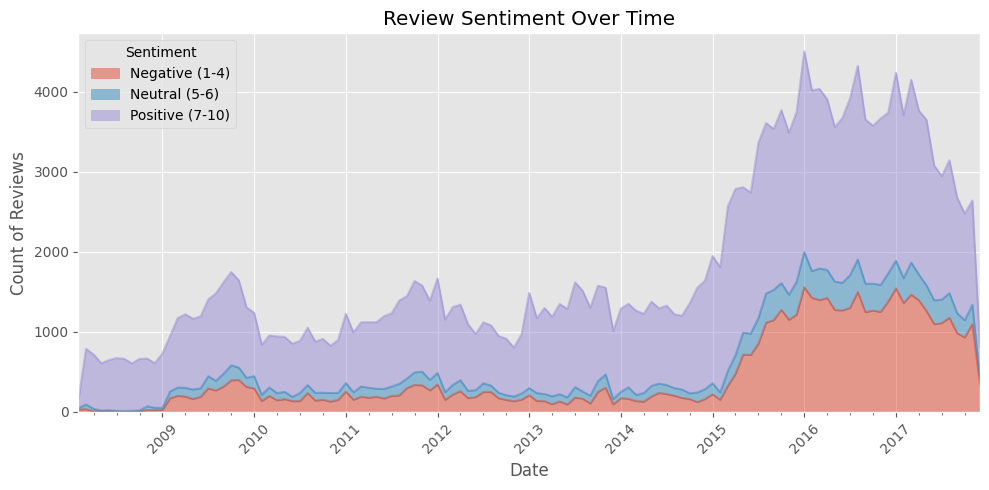

In [22]:
# Code 9.1: Review Semtiment Over Time

# Convert the date column to datetime 
ds['date'] = pd.to_datetime(ds['date'])

# Classify each rating into sentiment categories
def classify_sentiment(rating):
    if rating <= 4:
        return 'Negative (1-4)'
    elif rating <= 6:
        return 'Neutral (5-6)'
    else:
        return 'Positive (7-10)'

# Sentiment column
ds['Sentiment'] = ds['rating'].apply(classify_sentiment)

# Group by date and sentiment
sentiment_over_time = ds.groupby([ds['date'].dt.to_period('M'), 'Sentiment']).size().unstack(fill_value=0)

# Plot the data
sentiment_over_time.plot(kind='area', stacked=True, figsize=(10, 5), alpha=0.5)
plt.title('Review Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


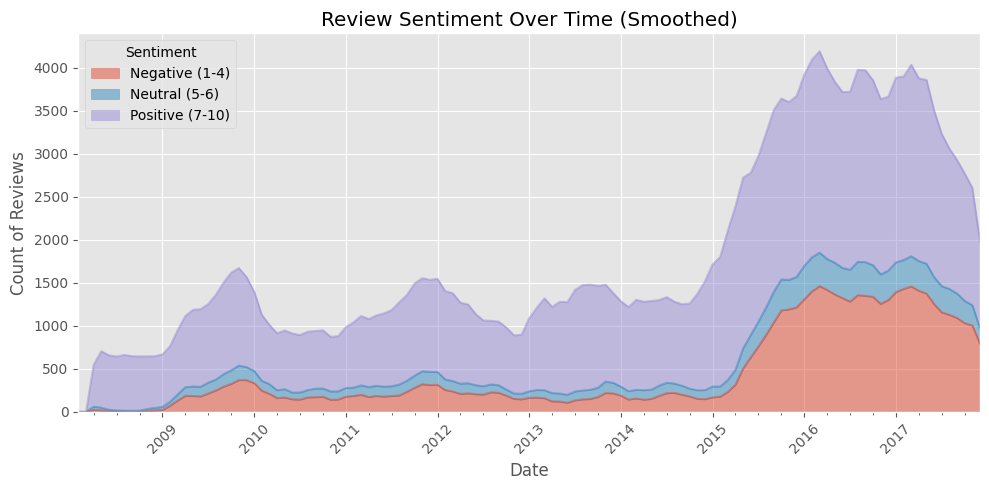

In [29]:
# Code 9.2: Review Semtiment Over Time (Smoothed)

# Convert the date column to datetime 
ds['date'] = pd.to_datetime(ds['date'])

# Classify each rating into sentiment categories
def classify_sentiment(rating):
    if rating <= 4:
        return 'Negative (1-4)'
    elif rating <= 6:
        return 'Neutral (5-6)'
    else:
        return 'Positive (7-10)'
    
# Sentiment column
ds['Sentiment'] = ds['rating'].apply(classify_sentiment)

# Group by date and sentiment
sentiment_over_time = ds.groupby([ds['date'].dt.to_period('M'), 'Sentiment']).size().unstack(fill_value=0)

# Smoothing the data by calculating the rolling mean
window_size = 3  # Change this number to adjust smoothing
smoothed_sentiment = sentiment_over_time.rolling(window=window_size).mean()

# Plot the data
smoothed_sentiment.plot(kind='area', stacked=True, figsize=(10, 5), alpha=0.5)
plt.title('Review Sentiment Over Time (Smoothed)')
plt.xlabel('Date')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout() 
plt.show()


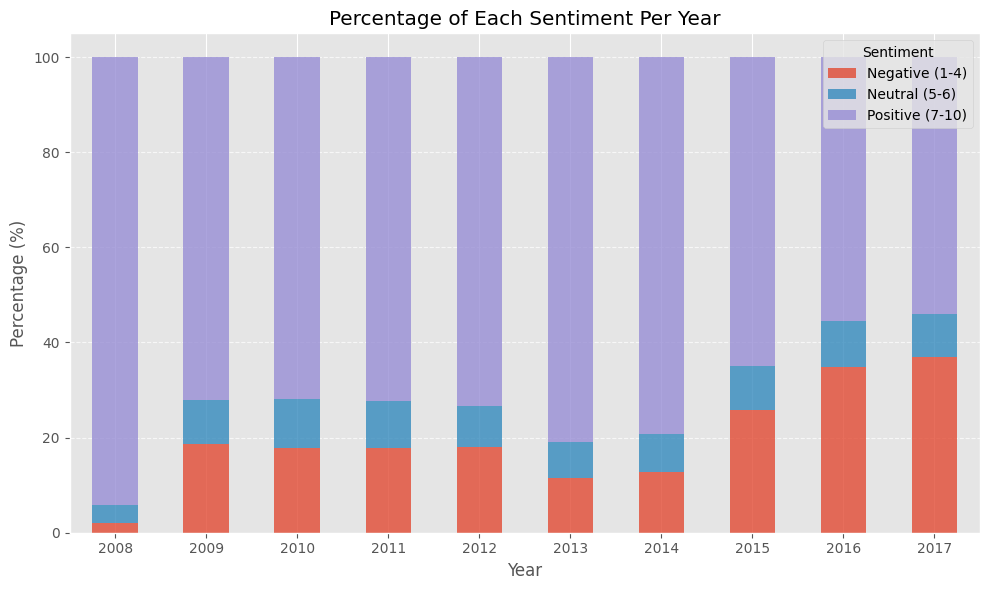

In [30]:
# Code 9.4: Percentage of Each Sentiment Per Year

# Convert the date column to datetime
ds['date'] = pd.to_datetime(ds['date'])

# Classify each rating into sentiment categories
def classify_sentiment(rating):
    if rating <= 4:
        return 'Negative (1-4)'
    elif rating <= 6:
        return 'Neutral (5-6)'
    else:
        return 'Positive (7-10)'
    
# Sentiment column
ds['Sentiment'] = ds['rating'].apply(classify_sentiment)

# Group by year and sentiment
sentiment_per_year = ds.groupby([ds['date'].dt.to_period('Y'), 'Sentiment']).size().unstack(fill_value=0)

# Calculate the percentage of each sentiment per year
sentiment_percentage = sentiment_per_year.div(sentiment_per_year.sum(axis=1), axis=0) * 100

# Plot the data
sentiment_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), alpha=0.8)
plt.title('Percentage of Each Sentiment Per Year')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)  
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()


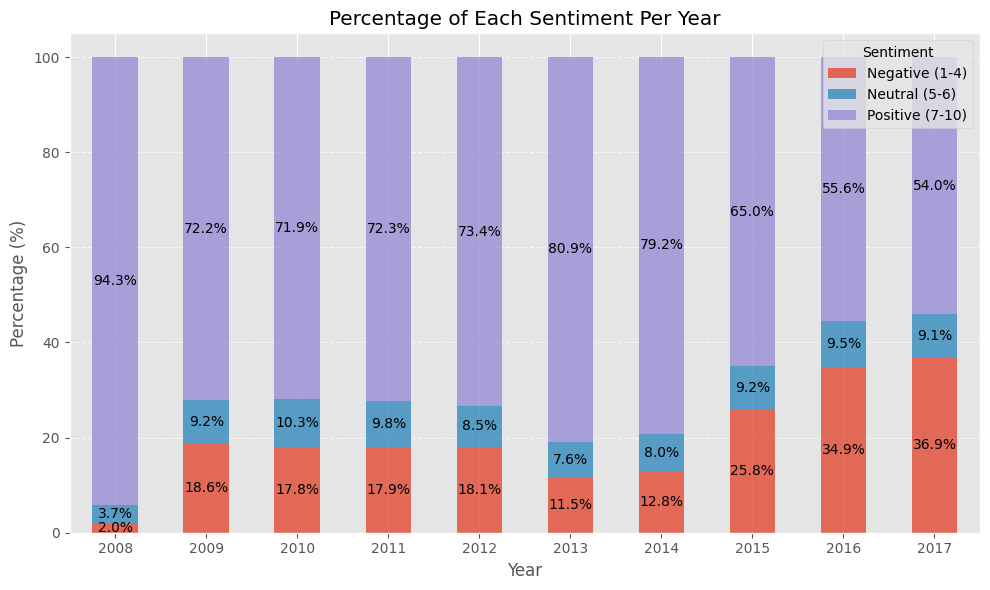

In [31]:
# Code 9.5: Exact Percentage of Each Sentiment Per Year 

# Convert the date column to datetime 
ds['date'] = pd.to_datetime(ds['date'])

# Classify each rating into sentiment categories
def classify_sentiment(rating):
    if rating <= 4:
        return 'Negative (1-4)'
    elif rating <= 6:
        return 'Neutral (5-6)'
    else:
        return 'Positive (7-10)'
    
# Sentiment column
ds['Sentiment'] = ds['rating'].apply(classify_sentiment)

# Group by year and sentiment
sentiment_per_year = ds.groupby([ds['date'].dt.to_period('Y'), 'Sentiment']).size().unstack(fill_value=0)

# Calculate the percentage of each sentiment per year
sentiment_percentage = sentiment_per_year.div(sentiment_per_year.sum(axis=1), axis=0) * 100

# Plot the data
ax = sentiment_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), alpha=0.8)
plt.title('Percentage of Each Sentiment Per Year')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)  
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the exact percentage on each bar 
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()
